In [3]:
import sys, os, glob, pickle, toml, json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def set_background(ax):
    ax.set_extent([-121, -72, 25, 50])

    # Background boundaries
    # ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray')
    
    return ax


def cal_ratio_within_bins(data, bins):
    binsc = np.zeros(len(bins)-1)
    ratio = np.zeros(len(bins)-1)
    for i in range(len(bins)-1):
        indi = (data>bins[i]) & (data<=bins[i+1])
        ratio[i] = np.sum(indi)/np.sum(~np.isnan(data))
        binsc[i] = (bins[i]+bins[i+1])/2
    return binsc, ratio

In [11]:
n = 627

kges = np.nan * np.zeros([n, 2, 10])

for b in range(n):
    
    kge400 = np.nan * np.zeros(10)
    for t in range(10):
        file = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{b}_MOASMOcalib/ctsm_outputs_normKGE/iter1_trial{t}/evaluation_many_metrics.csv'
        if os.path.isfile(file):
            dft = pd.read_csv(file)
            kge400[t] = dft['kge'].values[0]
    kges[b, 0, :] = kge400
    
    kge200 = np.nan * np.zeros(10)
    for t in range(10):
        file = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{b}_MOASMOcalib/ctsm_outputs_normKGE_200iter0/iter1_trial{t}/evaluation_many_metrics.csv'
        if os.path.isfile(file):
            dft = pd.read_csv(file)
            kge200[t] = dft['kge'].values[0]
    kges[b, 1, :] = kge200

0.6060606060606061


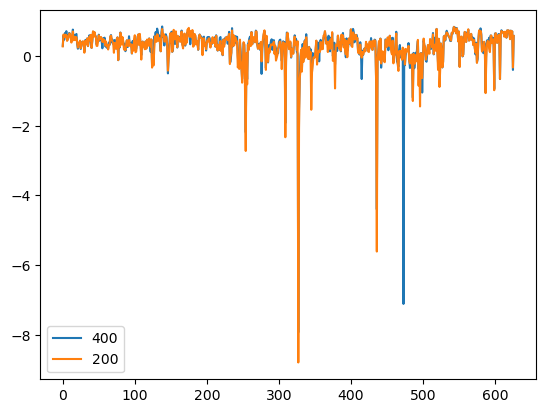

In [12]:
dm = np.nanmean(kges, axis=2)
print(np.sum(dm[:,0]>dm[:,1])/np.sum(~np.isnan(dm[:,0])))
plt.plot(dm)
plt.legend(['400', '200'])

In [10]:
np.nanmean(dm, axis=0)

array([0.48107461, 0.46700723])